In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Step 1: Input data for hours studied (x1), attendance rate (x2), and test scores (y)
def create_data():
    """
    Create a DataFrame with input data for hours studied, attendance rate, and test scores.

    Returns:
        pd.DataFrame: DataFrame with columns 'Hours_Studied (x1)', 'Attendance_Rate (x2)', and 'Test_Score (y)'.
    """
    data = {'Hours_Studied (x1)': [2, 3, 5, 7, 9],
            'Attendance_Rate (x2)': [70, 80, 60, 90, 95],
            'Test_Score (y)': [65, 70, 75, 85, 95]}
    return pd.DataFrame(data)

# Step 2: Fit a multiple linear regression model
def fit_regression_model(df):
    """
    Fit a multiple linear regression model to the data.

    Parameters:
        df (pd.DataFrame): DataFrame containing the input data for the regression.

    Returns:
        LinearRegression: The trained regression model.
        np.ndarray: The independent variables (X).
        np.ndarray: The dependent variable (y).
        float: The intercept of the regression model.
        np.ndarray: The coefficients of the regression model.
    """
    X = df[['Hours_Studied (x1)', 'Attendance_Rate (x2)']].values
    y = df['Test_Score (y)'].values

    model = LinearRegression()
    model.fit(X, y)

    intercept = model.intercept_
    coefficients = model.coef_

    return model, X, y, intercept, coefficients

# Step 3: Plot the regression plane and the actual data
def plot_regression_plane(df, model):
    """
    Plot the regression plane and the actual data points in a 3D space.

    Parameters:
        df (pd.DataFrame): DataFrame containing the input data.
        model (LinearRegression): The trained regression model.
    """
    # Create a grid for visualization
    x1_range = np.linspace(df['Hours_Studied (x1)'].min(), df['Hours_Studied (x1)'].max(), 10)
    x2_range = np.linspace(df['Attendance_Rate (x2)'].min(), df['Attendance_Rate (x2)'].max(), 10)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Predict y values over the grid for 3D plane visualization
    y_pred_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

    # Plot the actual data and the regression plane
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of actual data points
    ax.scatter(df['Hours_Studied (x1)'], df['Attendance_Rate (x2)'], df['Test_Score (y)'], color='blue', label='Actual Data')

    # Plot the fitted regression plane
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5, rstride=100, cstride=100)

    # Labels and title
    ax.set_title('3D Multiple Linear Regression: Test Scores, Hours Studied, and Attendance Rate', fontsize=14)
    ax.set_xlabel('Hours Studied ($x_1$)')
    ax.set_ylabel('Attendance Rate ($x_2$)')
    ax.set_zlabel('Test Score ($y$)')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Step 4: Display regression analysis
def display_regression_analysis(intercept, coefficients):
    """
    Display the regression equation and coefficients.

    Parameters:
        intercept (float): The intercept of the regression model.
        coefficients (np.ndarray): The coefficients of the regression model.
    """
    regression_equation = f"y = {intercept:.3f} + {coefficients[0]:.3f} * x1 + {coefficients[1]:.3f} * x2"
    print(f"Regression Equation: {regression_equation}")
    print(f"Coefficients: {coefficients}")
    print(f"Intercept: {intercept}")

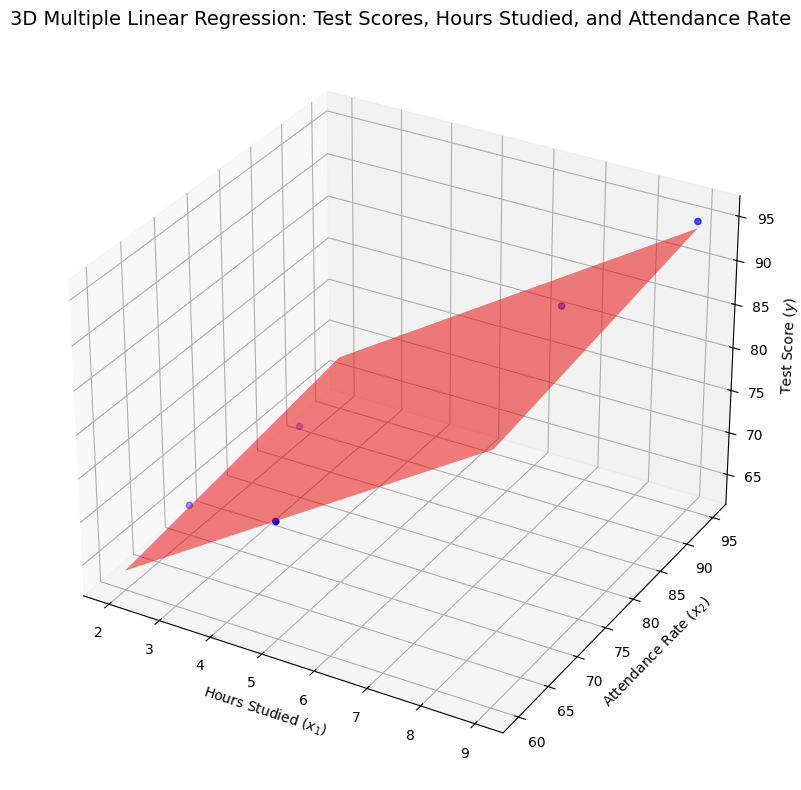

In [3]:
# Step 1: Create data
df = create_data()

# Step 2: Fit the regression model
model, X, y, intercept, coefficients = fit_regression_model(df)

# Step 3: Plot the data and the regression plane
plot_regression_plane(df, model)

In [4]:
# Step 4: Display regression analysis
display_regression_analysis(intercept, coefficients)

Regression Equation: y = 49.182 + 3.786 * x1 + 0.116 * x2
Coefficients: [3.78559177 0.11560892]
Intercept: 49.1818181818182
